**Task-1**: Download 2 grayscale images (8-bit) of HD resolution 1280x720 pixels. Image 1 will be used as the cover image, and the data from Image 2 will be used as secret information. Image 1 should have rapidly changing intensities, while image 2 should have regions where the pixels have similar values. Display both the images.

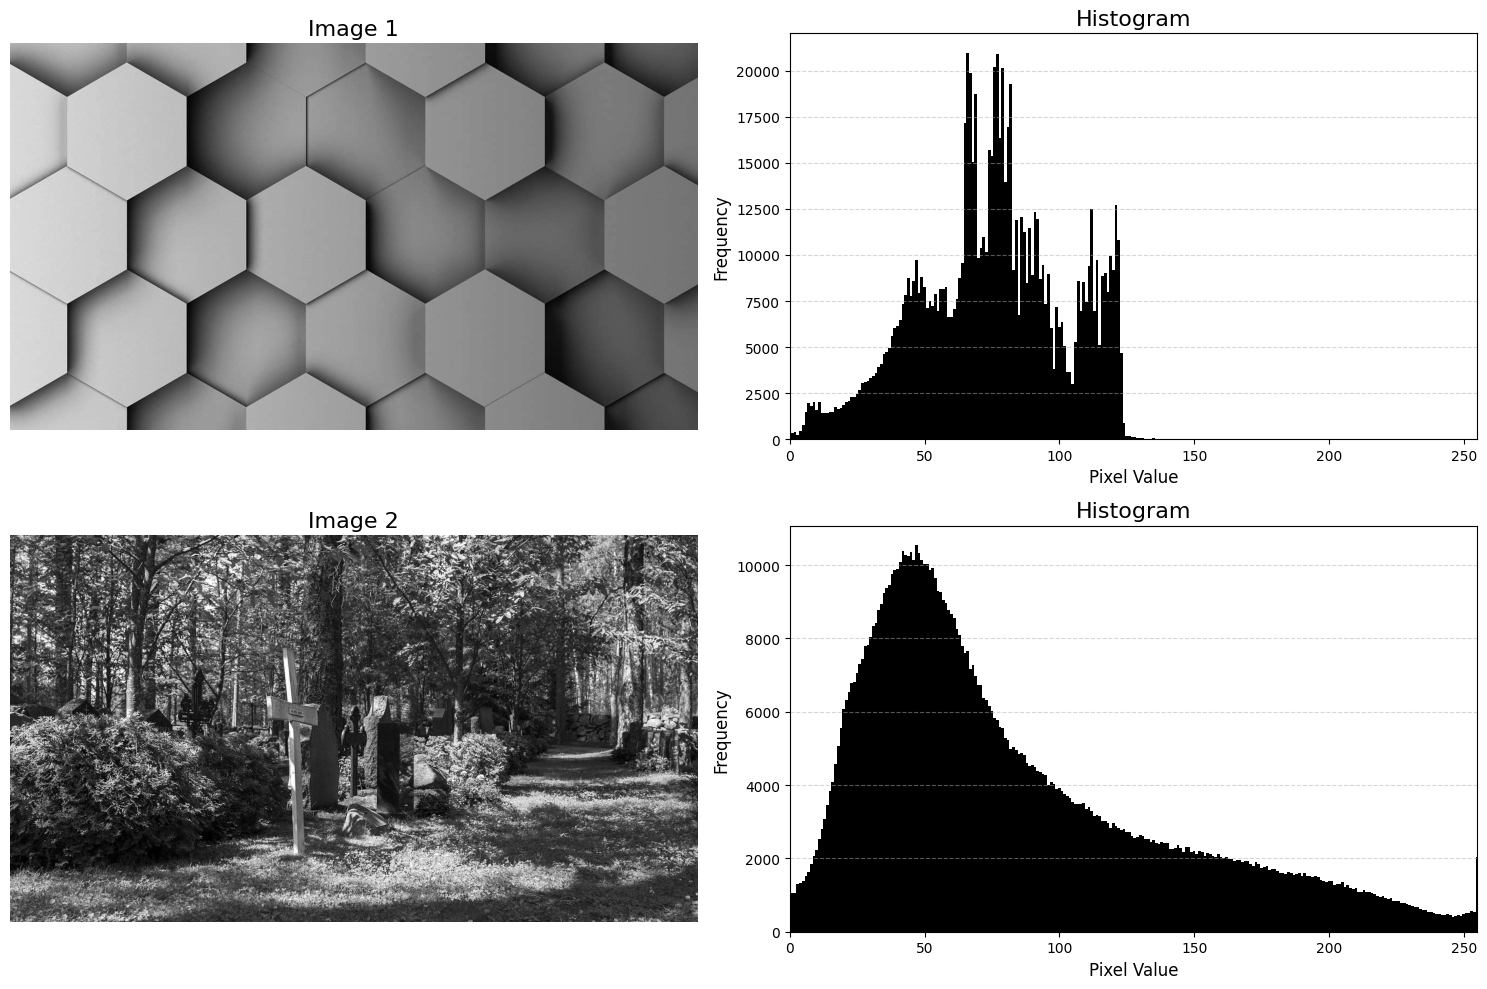

In [84]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def show_images_with_histograms(images):
    # Create a figure to hold the images and their histograms
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    for i, image in enumerate(images):
        # Open the image using PIL        
        # Convert image to numpy array for histogram calculation
        image_array = np.array(image)

        # Display the image
        axes[i, 0].imshow(image_array, cmap='gray')
        axes[i, 0].axis('off')  # Hide axes
        axes[i, 0].set_title(f'Image {i+1}', fontsize=16)

        # Calculate and display the histogram
        histogram, bins = np.histogram(image_array.flatten(), bins=256, range=[0, 256])
        axes[i, 1].bar(bins[:-1], histogram, width=1, color='black')
        axes[i, 1].set_xlim([0, 255])
        axes[i, 1].set_title('Histogram', fontsize=16)
        axes[i, 1].set_xlabel('Pixel Value', fontsize=12)
        axes[i, 1].set_ylabel('Frequency', fontsize=12)

        # Customize histogram aesthetics
        axes[i, 1].grid(axis='y', linestyle='--', alpha=0.5)

    # Adjust layout for better aesthetics
    plt.tight_layout()
    plt.show()

# Example usage with two image paths
image_paths = ['Image-2.jpg', 'Image-1.jpg'] 
image1 = Image.open(image_paths[0]).convert('L') 
image2 = Image.open(image_paths[1]).convert('L')
images =  [image1, image2]
show_images_with_histograms(images)


**Task-2**:	Display all 8 bit-planes of image 1 separately.

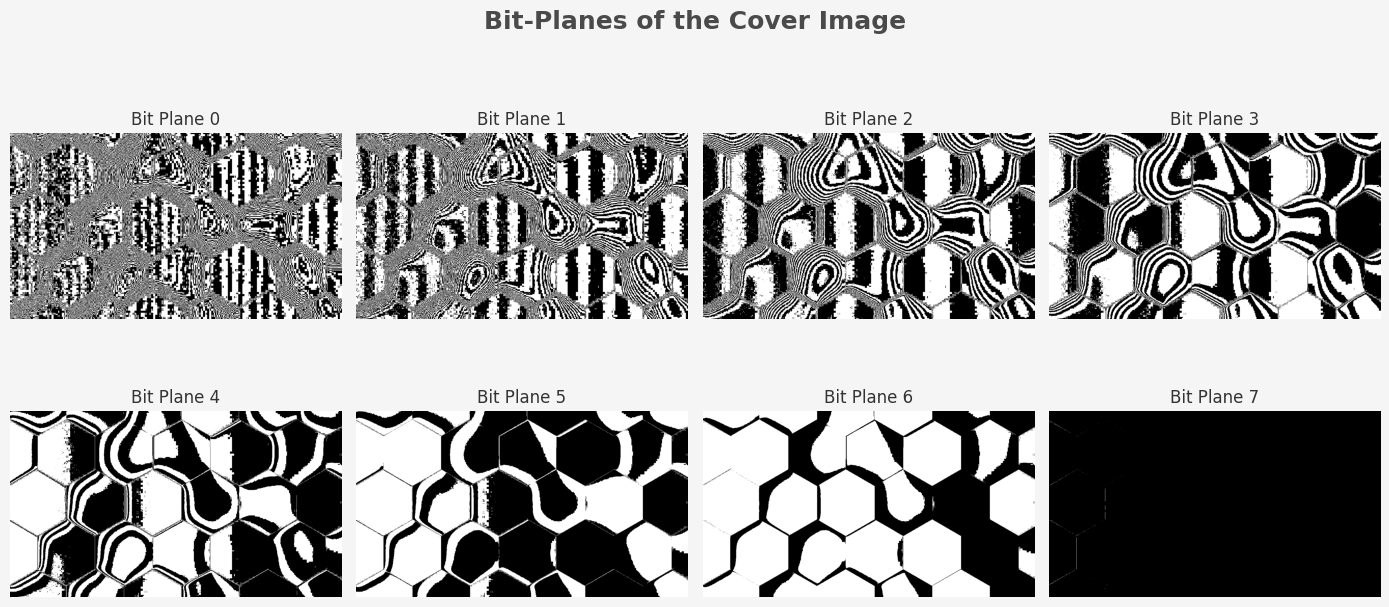

In [85]:
# Function to extract bit planes from a grayscale image
def extract_bit_planes(image):
    # Convert the image to a NumPy array
    image_array = np.array(image)
    # Extract and return all 8 bit-planes
    return [(image_array >> i) & 1 for i in range(8)]

bit_planes = extract_bit_planes(image1)

# Display all 8 bit-planes in a single figure
fig, axes = plt.subplots(2, 4, figsize=(14, 7), facecolor="#f5f5f5")
fig.suptitle("Bit-Planes of the Cover Image", fontsize=18, weight="bold", color="#4a4a4a")
for i, ax in enumerate(axes.ravel()):
    ax.imshow(bit_planes[i] * 255, cmap="gray")
    ax.set_title(f"Bit Plane {i}", fontsize=12, color="#333333")
    ax.axis("off")

plt.tight_layout()
plt.show()


**Task-3**: Implement the steganography algorithm to hide one bit of the second image in the cover image. Display Image 1 containing hidden information. At the receiver end, extract the hidden information and display it.

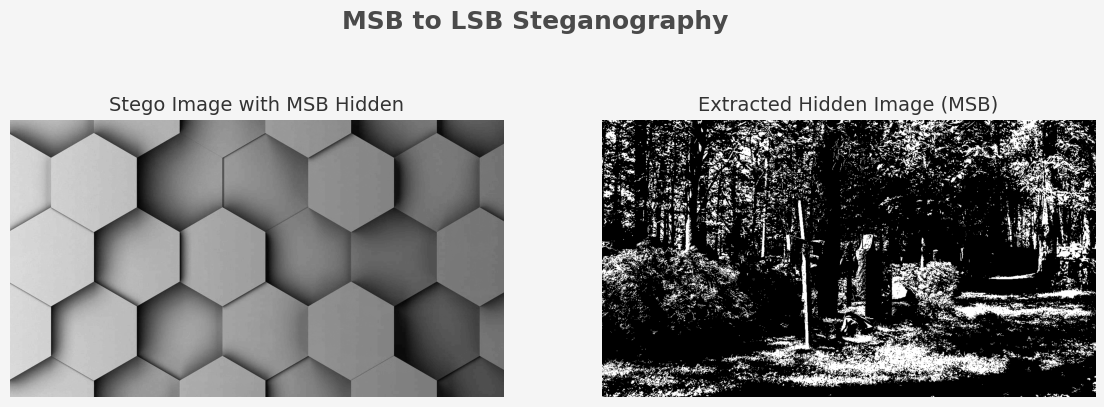

In [86]:
import numpy as np
import matplotlib.pyplot as plt

def hide_most_significant_bit_in_lsb(cover, secret):
    """Hide the most significant bit of the secret image in the least significant bit of the cover image."""
    # Use 0xFE (1111 1110) instead of ~1 to avoid overflow issues
    cover_masked = np.bitwise_and(cover, 0xFE)  # Clears the least significant bit of the cover image
    secret_msb = np.bitwise_and(secret, 0x80)   # Extracts the most significant bit of the secret image
    secret_msb_shifted = secret_msb >> 7        # Shift right to get 0 or 1 for LSB placement
    return np.bitwise_or(cover_masked, secret_msb_shifted)

def extract_hidden_image(stego_image):
    """Extract the hidden image by taking the least significant bit and visualizing it."""
    return np.bitwise_and(stego_image, 1) * 255  # Extracts LSB and scales for visibility

# Example usage:
# hide one bit and extract
stego_image_1bit = hide_most_significant_bit_in_lsb(image1, image2)
extracted_image_1bit = extract_hidden_image(stego_image_1bit)

# Display the stego image and extracted hidden image
fig, ax = plt.subplots(1, 2, figsize=(14, 7), facecolor="#f5f5f5")
fig.suptitle("MSB to LSB Steganography", fontsize=18, weight="bold", color="#4a4a4a", y=0.85)

# Display Stego Image with 1 Bit Hidden
ax[0].imshow(stego_image_1bit, cmap="gray")
ax[0].set_title("Stego Image with MSB Hidden", fontsize=14, color="#333333")
ax[0].axis("off")

# Display Extracted Image
ax[1].imshow(extracted_image_1bit, cmap="gray")
ax[1].set_title("Extracted Hidden Image (MSB)", fontsize=14, color="#333333")
ax[1].axis("off")

plt.show()


**Task-4**: Repeat the above process to hide 2-bits, 3-bits, 4-bits, 5-bits, 6-bits, and 7-bits of image 2 in the cover image. Display the corresponding images, i.e. cover image with hidden data and the extracted hidden data.

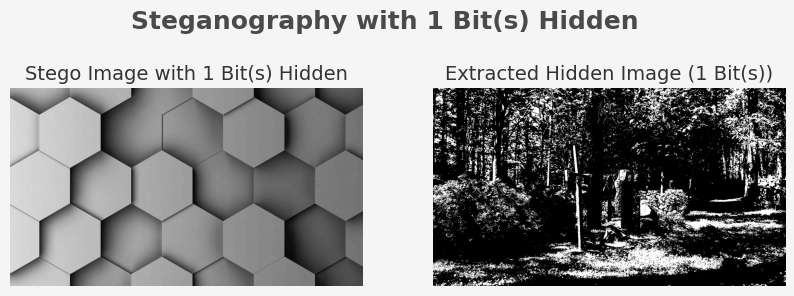

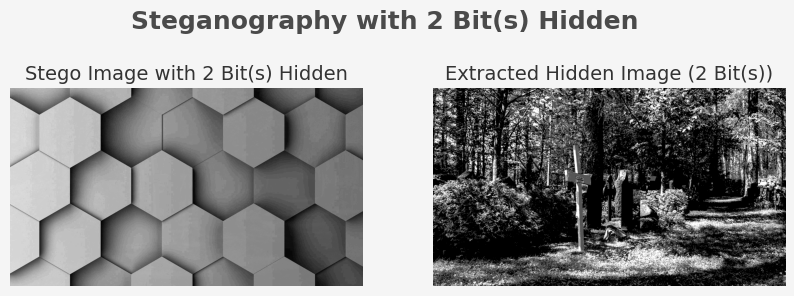

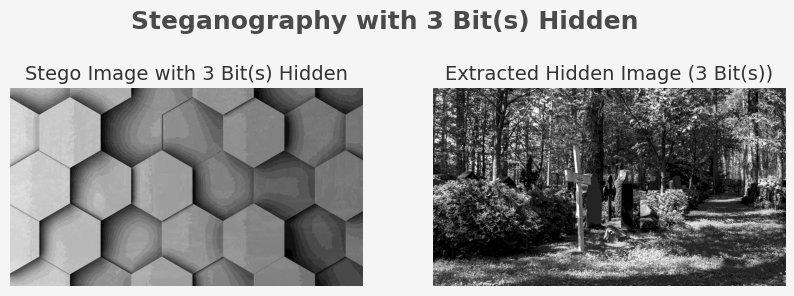

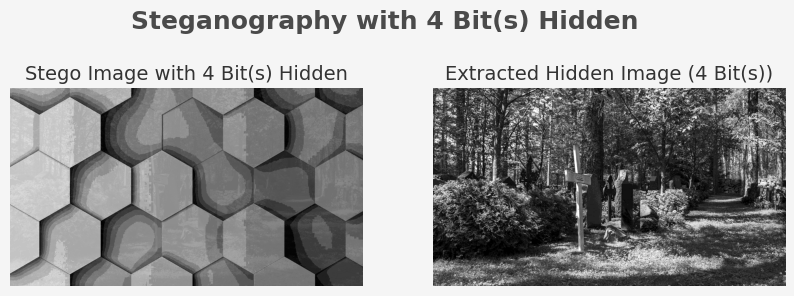

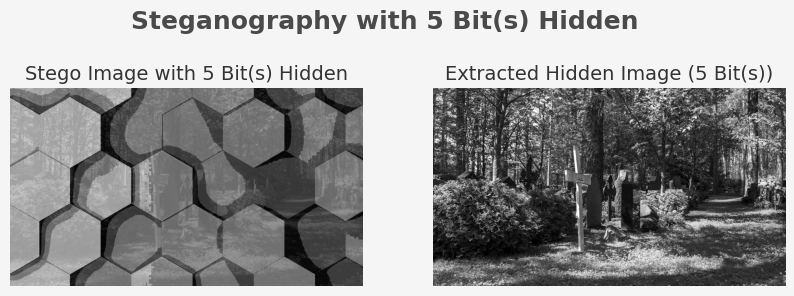

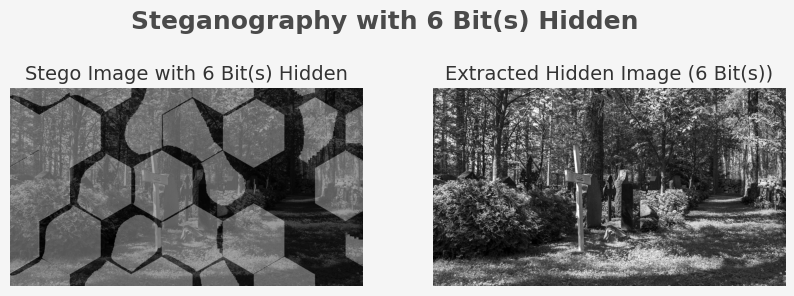

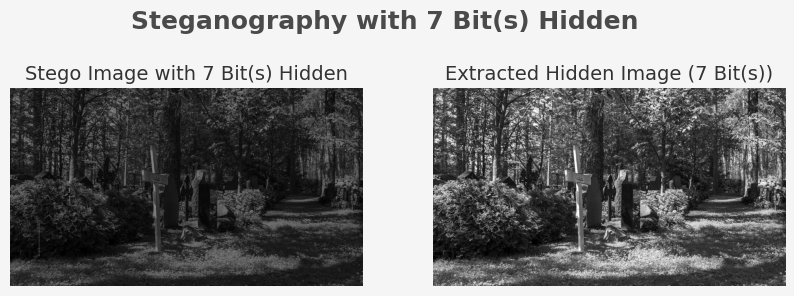

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def hide_n_bits(cover, secret, n):
    """Hide the n most significant bits of the secret image in the n least significant bits of the cover image."""
    if n < 1 or n > 7:
        raise ValueError("n must be between 1 and 7")
    
    # Ensure inputs are numpy arrays of type uint8
    cover = np.array(cover, dtype=np.uint8)
    secret = np.array(secret, dtype=np.uint8)
    
    # Clear the n least significant bits in the cover image
    cover_masked = np.bitwise_and(cover, 0xFF ^ ((1 << n) - 1))
    
    # Create a mask to isolate the n most significant bits of the secret image
    mask = (1 << n) - 1
    secret_bits = np.bitwise_and(secret >> (8 - n), mask)  # Shift MSBs of secret to align with cover LSBs

    # Combine the modified cover and the shifted secret bits
    return np.bitwise_or(cover_masked, secret_bits)

def extract_n_bits(stego_image, n):
    """Extract the hidden n bits from the stego image."""
    extracted_bits = np.bitwise_and(stego_image, (1 << n) - 1)  # Mask to keep only the n LSBs
    return extracted_bits << (8 - n)  # Shift left to scale extracted bits for visibility

# Load images and convert them to grayscale numpy arrays if needed
cover_image = np.array(Image.open('Image-2.jpg').convert('L'), dtype=np.uint8)
secret_image = np.array(Image.open('Image-1.jpg').convert('L'), dtype=np.uint8)

for n in range(1, 8):
    # Hide n bits and extract
    stego_image_nbits = hide_n_bits(cover_image, secret_image, n)
    extracted_image_nbits = extract_n_bits(stego_image_nbits, n)
    
    # Create a new figure for each bit level
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), facecolor="#f5f5f5")
    fig.suptitle(f"Steganography with {n} Bit(s) Hidden", fontsize=18, weight="bold", color="#4a4a4a", y=0.85)
    
    # Display the stego image with hidden data
    axs[0].imshow(stego_image_nbits, cmap="gray")
    axs[0].set_title(f"Stego Image with {n} Bit(s) Hidden", fontsize=14, color="#333333")
    axs[0].axis("off")

    # Display the extracted hidden image
    axs[1].imshow(extracted_image_nbits, cmap="gray")
    axs[1].set_title(f"Extracted Hidden Image ({n} Bit(s))", fontsize=14, color="#333333")
    axs[1].axis("off")

    plt.show()


**Task-5**: Now, change the roles of the two images and repeat the above-mentioned steps.

**Task-5a**: Download 2 grayscale images (8-bit) of HD resolution 1280x720 pixels. Image 1 will be used as the cover image, and the data from Image 2 will be used as secret information. Image 1 should have rapidly changing intensities, while image 2 should have regions where the pixels have similar values. Display both the images.

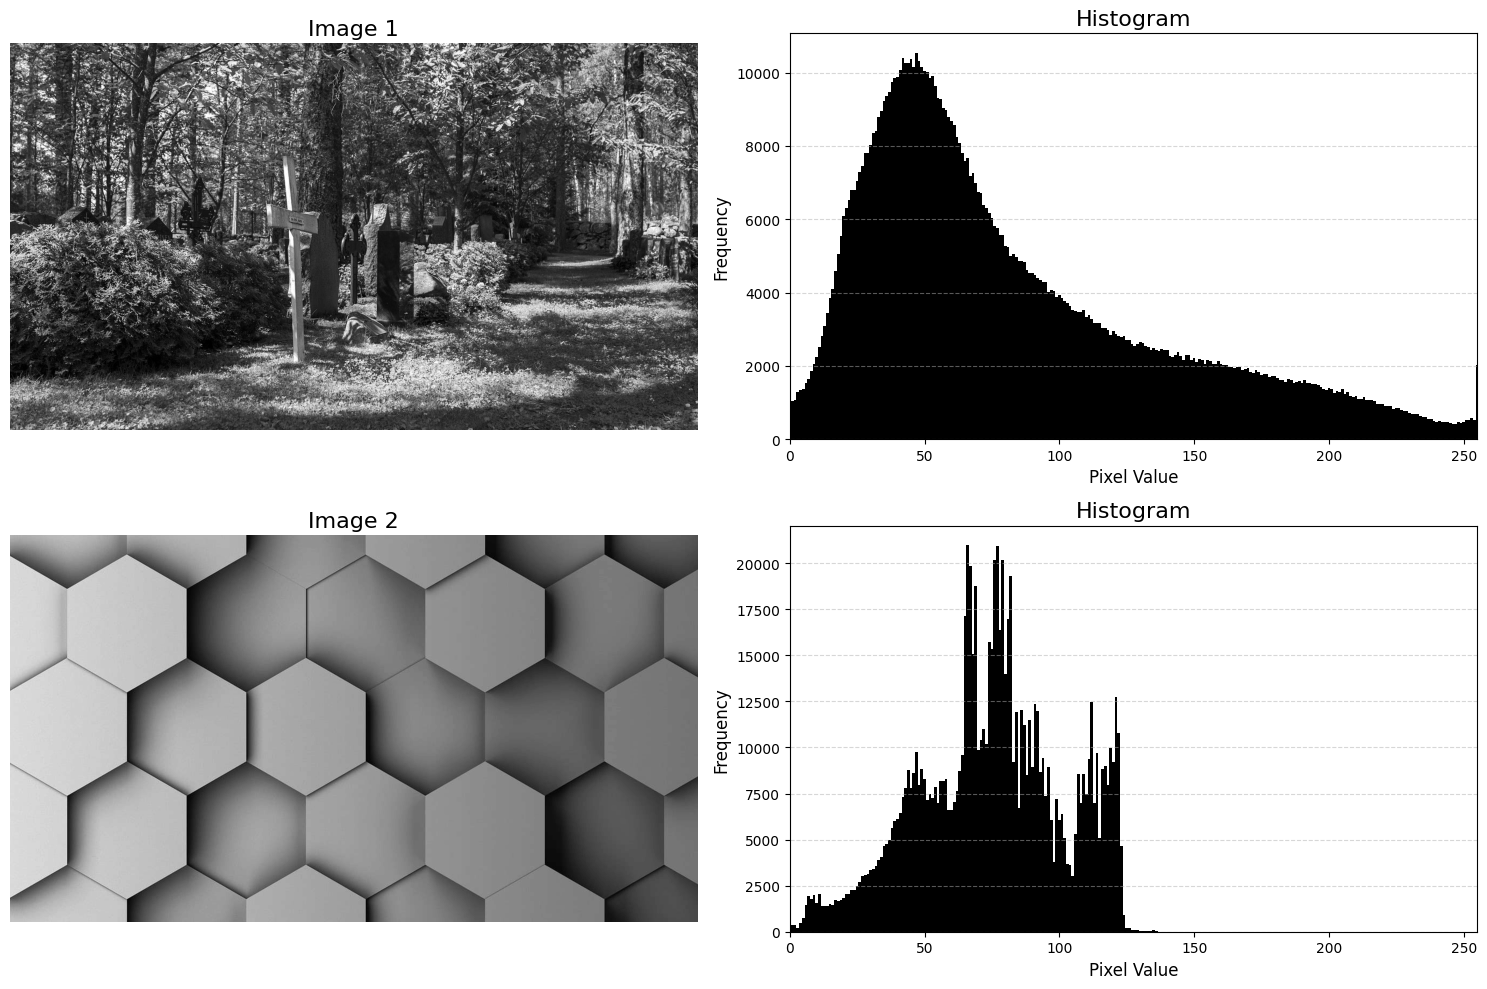

In [88]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def show_images_with_histograms(images):
    # Create a figure to hold the images and their histograms
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    for i, image in enumerate(images):
        # Open the image using PIL        
        # Convert image to numpy array for histogram calculation
        image_array = np.array(image)

        # Display the image
        axes[i, 0].imshow(image_array, cmap='gray')
        axes[i, 0].axis('off')  # Hide axes
        axes[i, 0].set_title(f'Image {i+1}', fontsize=16)

        # Calculate and display the histogram
        histogram, bins = np.histogram(image_array.flatten(), bins=256, range=[0, 256])
        axes[i, 1].bar(bins[:-1], histogram, width=1, color='black')
        axes[i, 1].set_xlim([0, 255])
        axes[i, 1].set_title('Histogram', fontsize=16)
        axes[i, 1].set_xlabel('Pixel Value', fontsize=12)
        axes[i, 1].set_ylabel('Frequency', fontsize=12)

        # Customize histogram aesthetics
        axes[i, 1].grid(axis='y', linestyle='--', alpha=0.5)

    # Adjust layout for better aesthetics
    plt.tight_layout()
    plt.show()

# Example usage with two image paths
image_paths = ['Image-1.jpg', 'Image-2.jpg'] 
image1 = Image.open(image_paths[0]).convert('L') 
image2 = Image.open(image_paths[1]).convert('L')
images =  [image1, image2]
show_images_with_histograms(images)


**Task-5b**: Display all 8 bit-planes of image 1 separately.

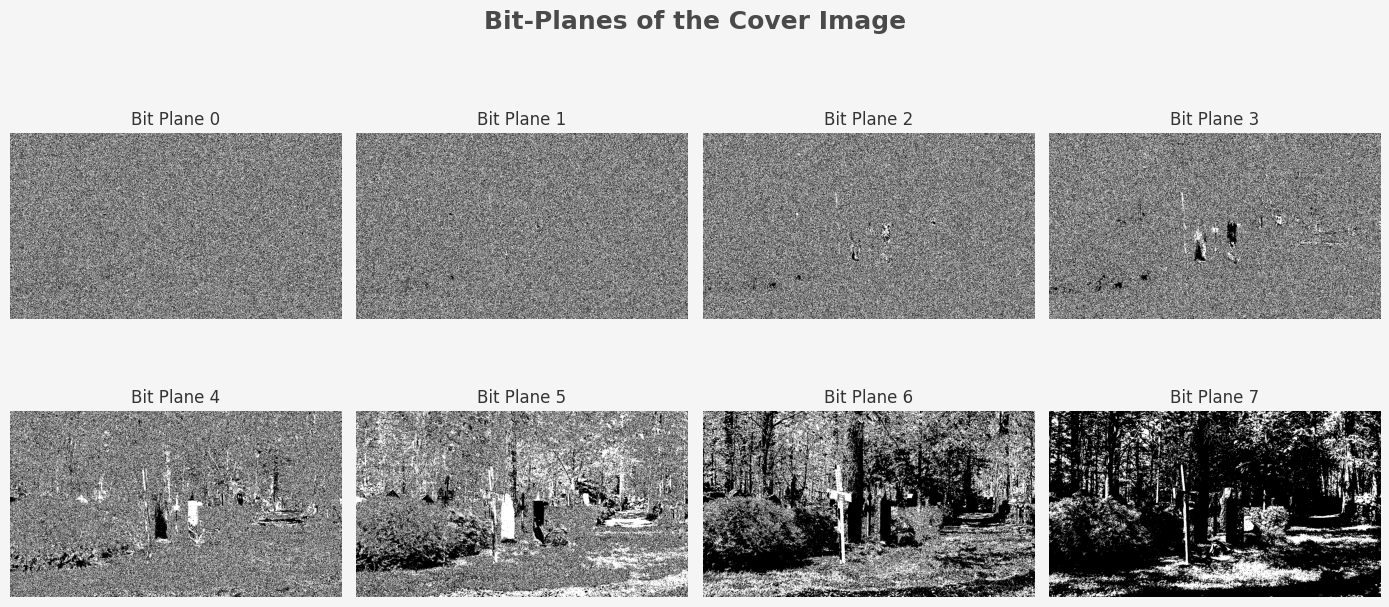

In [89]:
# Function to extract bit planes from a grayscale image
def extract_bit_planes(image):
    # Convert the image to a NumPy array
    image_array = np.array(image)
    # Extract and return all 8 bit-planes
    return [(image_array >> i) & 1 for i in range(8)]

bit_planes = extract_bit_planes(image1)

# Display all 8 bit-planes in a single figure
fig, axes = plt.subplots(2, 4, figsize=(14, 7), facecolor="#f5f5f5")
fig.suptitle("Bit-Planes of the Cover Image", fontsize=18, weight="bold", color="#4a4a4a")
for i, ax in enumerate(axes.ravel()):
    ax.imshow(bit_planes[i] * 255, cmap="gray")
    ax.set_title(f"Bit Plane {i}", fontsize=12, color="#333333")
    ax.axis("off")

plt.tight_layout()
plt.show()


**Task-5c**: Implement the steganography algorithm to hide one bit of the second image in the cover image. Display Image 1 containing hidden information. At the receiver end, extract the hidden information and display it.

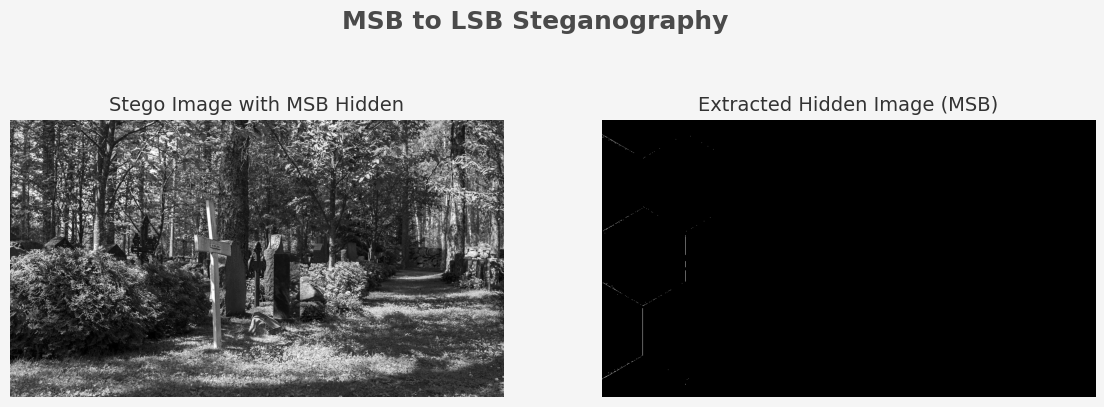

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def hide_most_significant_bit_in_lsb(cover, secret):
    """Hide the most significant bit of the secret image in the least significant bit of the cover image."""
    # Use 0xFE (1111 1110) instead of ~1 to avoid overflow issues
    cover_masked = np.bitwise_and(cover, 0xFE)  # Clears the least significant bit of the cover image
    secret_msb = np.bitwise_and(secret, 0x80)   # Extracts the most significant bit of the secret image
    secret_msb_shifted = secret_msb >> 7        # Shift right to get 0 or 1 for LSB placement
    return np.bitwise_or(cover_masked, secret_msb_shifted)

def extract_hidden_image(stego_image):
    """Extract the hidden image by taking the least significant bit and visualizing it."""
    return np.bitwise_and(stego_image, 1) * 255  # Extracts LSB and scales for visibility

# Example usage:
# hide one bit and extract
stego_image_1bit = hide_most_significant_bit_in_lsb(image1, image2)
extracted_image_1bit = extract_hidden_image(stego_image_1bit)

# Display the stego image and extracted hidden image
fig, ax = plt.subplots(1, 2, figsize=(14, 7), facecolor="#f5f5f5")
fig.suptitle("MSB to LSB Steganography", fontsize=18, weight="bold", color="#4a4a4a", y=0.85)

# Display Stego Image with 1 Bit Hidden
ax[0].imshow(stego_image_1bit, cmap="gray")
ax[0].set_title("Stego Image with MSB Hidden", fontsize=14, color="#333333")
ax[0].axis("off")

# Display Extracted Image
ax[1].imshow(extracted_image_1bit, cmap="gray")
ax[1].set_title("Extracted Hidden Image (MSB)", fontsize=14, color="#333333")
ax[1].axis("off")

plt.show()


**Task-5d**: Repeat the above process to hide 2-bits, 3-bits, 4-bits, 5-bits, 6-bits, and 7-bits of image 2 in the cover image. Display the corresponding images, i.e. cover image with hidden data and the extracted hidden data.

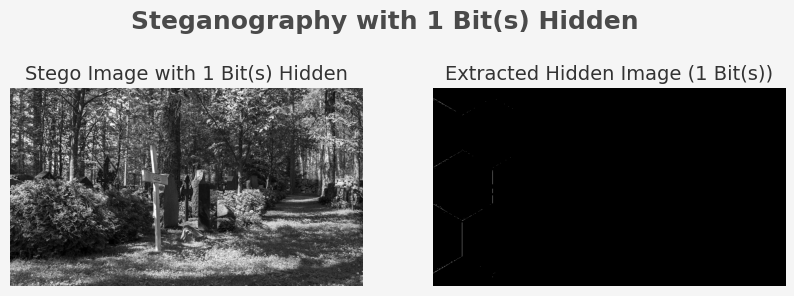

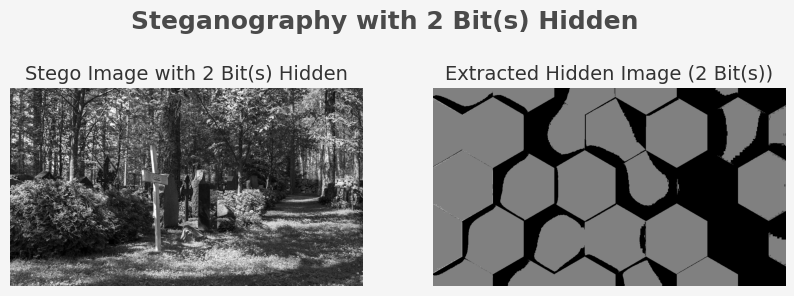

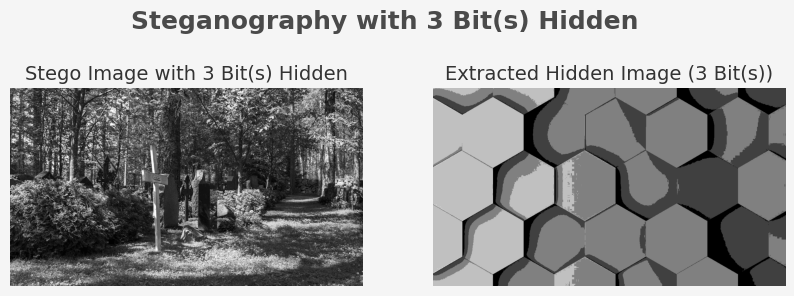

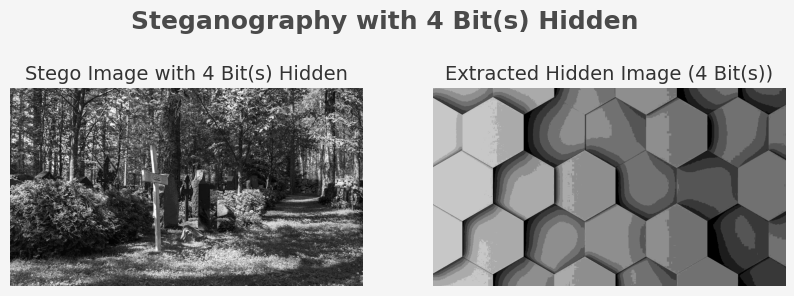

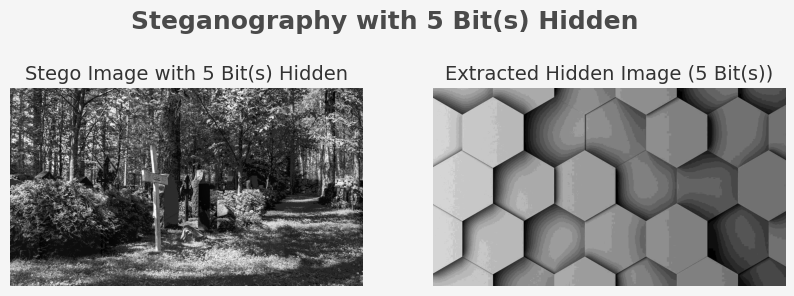

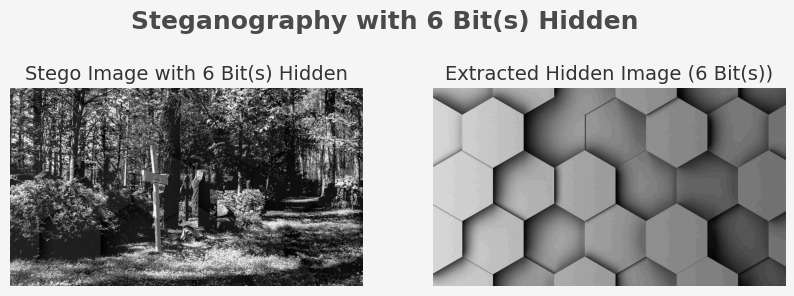

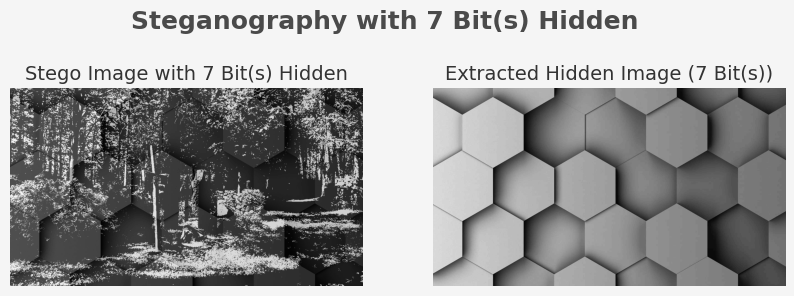

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def hide_n_bits(cover, secret, n):
    """Hide the n most significant bits of the secret image in the n least significant bits of the cover image."""
    if n < 1 or n > 7:
        raise ValueError("n must be between 1 and 7")
    
    # Ensure inputs are numpy arrays of type uint8
    cover = np.array(cover, dtype=np.uint8)
    secret = np.array(secret, dtype=np.uint8)
    
    # Clear the n least significant bits in the cover image
    cover_masked = np.bitwise_and(cover, 0xFF ^ ((1 << n) - 1))
    
    # Create a mask to isolate the n most significant bits of the secret image
    mask = (1 << n) - 1
    secret_bits = np.bitwise_and(secret >> (8 - n), mask)  # Shift MSBs of secret to align with cover LSBs

    # Combine the modified cover and the shifted secret bits
    return np.bitwise_or(cover_masked, secret_bits)

def extract_n_bits(stego_image, n):
    """Extract the hidden n bits from the stego image."""
    extracted_bits = np.bitwise_and(stego_image, (1 << n) - 1)  # Mask to keep only the n LSBs
    return extracted_bits << (8 - n)  # Shift left to scale extracted bits for visibility

# Load images and convert them to grayscale numpy arrays if needed
cover_image = np.array(Image.open('Image-1.jpg').convert('L'), dtype=np.uint8)
secret_image = np.array(Image.open('Image-2.jpg').convert('L'), dtype=np.uint8)

for n in range(1, 8):
    # Hide n bits and extract
    stego_image_nbits = hide_n_bits(cover_image, secret_image, n)
    extracted_image_nbits = extract_n_bits(stego_image_nbits, n)
    
    # Create a new figure for each bit level
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), facecolor="#f5f5f5")
    fig.suptitle(f"Steganography with {n} Bit(s) Hidden", fontsize=18, weight="bold", color="#4a4a4a", y=0.85)
    
    # Display the stego image with hidden data
    axs[0].imshow(stego_image_nbits, cmap="gray")
    axs[0].set_title(f"Stego Image with {n} Bit(s) Hidden", fontsize=14, color="#333333")
    axs[0].axis("off")

    # Display the extracted hidden image
    axs[1].imshow(extracted_image_nbits, cmap="gray")
    axs[1].set_title(f"Extracted Hidden Image ({n} Bit(s))", fontsize=14, color="#333333")
    axs[1].axis("off")

    plt.show()
